In [1]:
from load_modules import *
import my_config
import time
K.clear_session()
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"

2023-06-27 22:26:52.946025: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-27 22:26:52.972869: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
if my_config.USE_GPU:
    physical_devices = tf.config.list_physical_devices('GPU')
    #set memory amount to half of GPU
    if len(physical_devices) > 0:
        for device in physical_devices:
            print("Device:", device)
    else:
        print("No GPU devices found.")
    # Set GPU memory growth
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                
        except RuntimeError as e:
            print(e)
        # Set environment variable for GPU memory allocation
    os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
    # Test for GPU device name
    name = tf.test.gpu_device_name()
    if name != '/device:GPU:0':
        raise SystemError('GPU device not found')
    print('Found GPU at: {}'.format(name))
    # Print the number of available GPUs
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("No GPU")

Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Found GPU at: /device:GPU:0
Num GPUs Available:  1


2023-06-27 22:26:54.534365: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-27 22:26:54.538808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-27 22:26:54.539000: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-27 22:26:54.541810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-27 22:26:54.542835: I tensorflow/compile

In [3]:
encoder = load_model(my_config.ENCODER_PATH)
decoder = load_model(my_config.DECODER_PATH)
print("Loaded models")
print("Encoder summary:" + str(encoder.summary()))
print("Decoder summary:" + str(decoder.summary()))
def encode(img):
    image = np.asarray(img).reshape(-1,3).astype('float32')
    # pred_maps = encoder.predict(image)
    start = time.time()
    pred_maps = None
    with tf.device('/device:GPU:0'):
        pred_maps = encoder.predict_on_batch(image)
    end = time.time()
    elapsed = end - start
    return pred_maps, elapsed
 
def decode(encoded):
    # recovered = decoder.predict(encoded)
    start = time.time()
    recovered = None
    with tf.device('/device:GPU:0'):
        recovered = decoder.predict_on_batch(encoded)
    end = time.time()
    elapsed = end - start
    # recovered = np.clip(recovered, 0, 1)
    return recovered, elapsed

Loaded models
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 3)]               0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 75)                300       
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 75)                5700      
_________________________________________________________________
decoder_output (Dense)       (None, 5)                 380       
Total params: 6,380
Trainable params: 6,380
Non-trainable params: 0
_________________________________________________________________
Encoder summary:None
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 5)]               0         
_____

2023-06-27 22:26:55.133837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-27 22:26:55.134136: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-27 22:26:55.134379: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-27 22:26:55.134673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-27 22:26:55.134679: I tensorflow/core/co

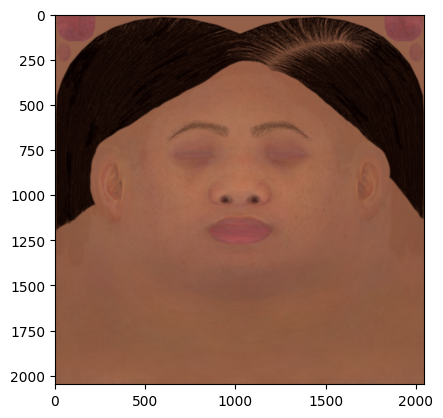

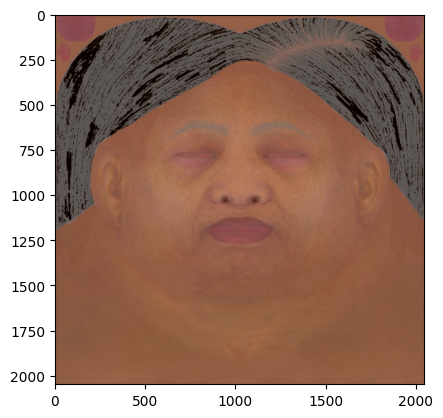

2023-06-27 22:27:15.171994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [4194304,3]
	 [[{{node Placeholder/_0}}]]
2023-06-27 22:27:16.080290: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-27 22:27:16.537228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [4194304,3]
	 [[{{node Placeholder/_0}}]]


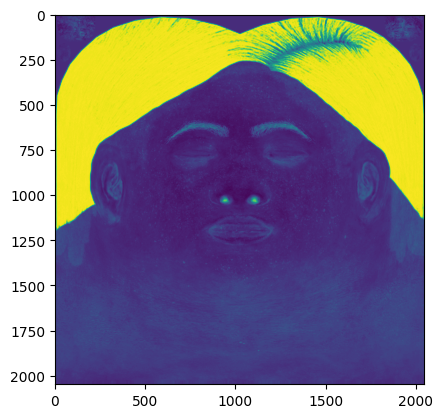

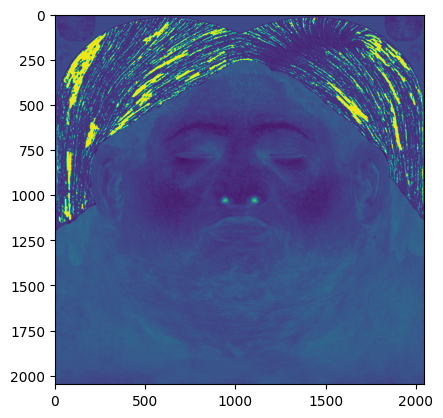

In [5]:
#load neutral image
neutral_path = r"meta46/neutral/FaceColor_MAIN_LOD.PNG"
aged_path = r"meta46/old/FaceColor_MAIN_LOD.PNG"
#display neutral image
neutral_image = Image.open(neutral_path).resize((2048,2048))

plt.imshow(neutral_image)
plt.show()
#display aged image
aged_image = Image.open(aged_path).resize((2048,2048))
plt.imshow(aged_image)
plt.show()


#encode neutral image
WIDTH = neutral_image.size[0]
HEIGHT = neutral_image.size[1]
neutral_image = np.asarray(neutral_image)/255.0
neutral_image = neutral_image[:, :, :3]  # keep only R, G, and B channels

neutral_pred_maps, neutral_encode_time = encode(neutral_image)
neutral_Cm = np.asarray(neutral_pred_maps[:,0])
neutral_Ch = np.asarray(neutral_pred_maps[:,1])
neutral_Bm = np.asarray(neutral_pred_maps[:,2])
neutral_Bh = np.asarray(neutral_pred_maps[:,3])
neutral_T = np.asarray(neutral_pred_maps[:,4])

#encode aged image
WIDTH = aged_image.size[0]
HEIGHT = aged_image.size[1]
aged_image = np.asarray(aged_image)/255.0
aged_image = aged_image[:, :, :3]
aged_pred_maps, aged_encode_time = encode(aged_image)
aged_Cm = np.asarray(aged_pred_maps[:,0])
aged_Ch = np.asarray(aged_pred_maps[:,1])
aged_Bm = np.asarray(aged_pred_maps[:,2])
aged_Bh = np.asarray(aged_pred_maps[:,3])
aged_T = np.asarray(aged_pred_maps[:,4])
#show Melanin maps
plt.imshow(neutral_Cm.reshape((WIDTH, HEIGHT)))
plt.show()
plt.imshow(aged_Cm.reshape((WIDTH, HEIGHT)))
plt.show()
#save aged pred maps to csv
header = ["Cm", "Ch", "Bm", "Bh", "T"]
np.savetxt("aged_pred_maps2048.csv", aged_pred_maps, delimiter=",", header="Cm, Ch, Bm, Bh, T", comments="")
#save neutral pred maps to csv
header = ["Cm", "Ch", "Bm", "Bh", "T"]
np.savetxt("neutral_pred_maps2048.csv", neutral_pred_maps, delimiter=",", header="Cm, Ch, Bm, Bh, T", comments="")

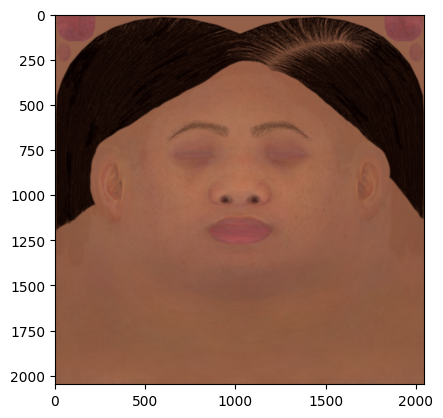

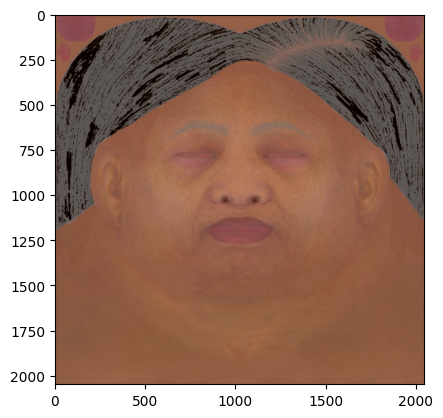

2023-06-27 22:28:12.857333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [4194304,3]
	 [[{{node Placeholder/_0}}]]
2023-06-27 22:28:13.294785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [4194304,3]
	 [[{{node Placeholder/_0}}]]


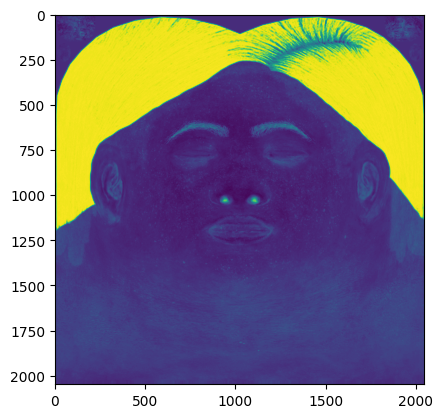

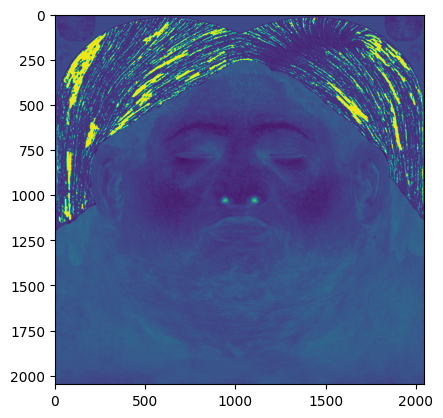

In [6]:
#load neutral image
neutral_path = r"meta46/neutral/FaceColor_MAIN_LOD.PNG"
aged_path = r"meta46/old/FaceColor_MAIN_LOD.PNG"
#display neutral image
neutral_image = Image.open(neutral_path).resize((2048,2048))

plt.imshow(neutral_image)
plt.show()
#display aged image
aged_image = Image.open(aged_path).resize((2048,2048))
plt.imshow(aged_image)
plt.show()

#encode neutral image
WIDTH = neutral_image.size[0]
HEIGHT = neutral_image.size[1]
neutral_image = np.asarray(neutral_image)/255.0
neutral_image = neutral_image[:, :, :3]  # keep only R, G, and B channels

neutral_pred_maps, neutral_encode_time = encode(neutral_image)
neutral_Cm = np.asarray(neutral_pred_maps[:,0])
neutral_Ch = np.asarray(neutral_pred_maps[:,1])
neutral_Bm = np.asarray(neutral_pred_maps[:,2])
neutral_Bh = np.asarray(neutral_pred_maps[:,3])
neutral_T = np.asarray(neutral_pred_maps[:,4])

#encode aged image
WIDTH = aged_image.size[0]
HEIGHT = aged_image.size[1]
aged_image = np.asarray(aged_image)/255.0
aged_image = aged_image[:, :, :3]
aged_pred_maps, aged_encode_time = encode(aged_image)
aged_Cm = np.asarray(aged_pred_maps[:,0])
aged_Ch = np.asarray(aged_pred_maps[:,1])
aged_Bm = np.asarray(aged_pred_maps[:,2])
aged_Bh = np.asarray(aged_pred_maps[:,3])
aged_T = np.asarray(aged_pred_maps[:,4])
#show Melanin maps
plt.imshow(neutral_Cm.reshape((WIDTH, HEIGHT)))
plt.show()
plt.imshow(aged_Cm.reshape((WIDTH, HEIGHT)))
plt.show()
#save aged pred maps to csv
header = ["Cm", "Ch", "Bm", "Bh", "T"]
np.savetxt("aged_pred_maps256.csv", aged_pred_maps, delimiter=",", header="Cm, Ch, Bm, Bh, T", comments="")
#save neutral pred maps to csv
header = ["Cm", "Ch", "Bm", "Bh", "T"]
np.savetxt("neutral_pred_maps256.csv", neutral_pred_maps, delimiter=",", header="Cm, Ch, Bm, Bh, T", comments="")


In [9]:
#load aged pred maps from csv
aged_pred_maps = pd.read_csv("aged_pred_maps256.csv")
neutral_pred_maps = pd.read_csv("neutral_pred_maps256.csv")
#print headers
print(aged_pred_maps.head())
print(neutral_pred_maps.head())
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(65, activation='relu', input_shape=(5,)),  # Input layer (5 features: 'Cm', 'Ch', 'Bm', 'Bh', 'T')
    Dense(65, activation='relu'),  # Hidden layer
    Dense(5, activation='linear')  # Output layer (5 predictions: 'Cm', 'Ch', 'Bm', 'Bh', 'T')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mae'])

# Print the summary of the model
model.summary()
x = neutral_pred_maps
y = aged_pred_maps
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, shuffle=True)
with tf.device('/device:GPU:0'):
    model.fit(x_train, y_train, 
        validation_data=(x_test, y_test), 
        epochs=40, 
        batch_size=4096*2)


         Cm        Ch       Bm        Bh         T
0  0.133195  0.117286  0.45665  0.628914  0.140636
1  0.133195  0.117286  0.45665  0.628914  0.140636
2  0.133195  0.117286  0.45665  0.628914  0.140636
3  0.133195  0.117286  0.45665  0.628914  0.140636
4  0.133195  0.117286  0.45665  0.628914  0.140636
         Cm        Ch       Bm       Bh         T
0  0.126237  0.122389  0.45762  0.62425  0.141782
1  0.126237  0.122389  0.45762  0.62425  0.141782
2  0.126237  0.122389  0.45762  0.62425  0.141782
3  0.126237  0.122389  0.45762  0.62425  0.141782
4  0.126237  0.122389  0.45762  0.62425  0.141782
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 65)                390       
                                                                 
 dense_4 (Dense)             (None, 65)                4290      
                                          

131072/131072 [==============================] - 133s 1ms/step


2023-06-27 22:33:59.399387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [4194304,5]
	 [[{{node Placeholder/_0}}]]


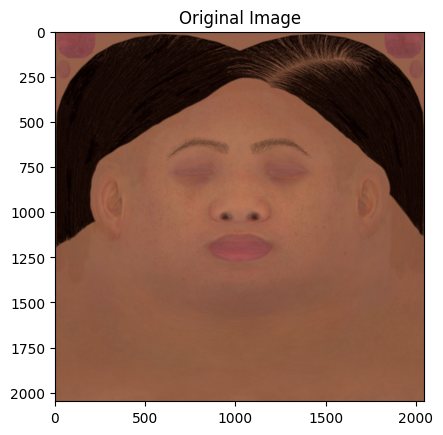

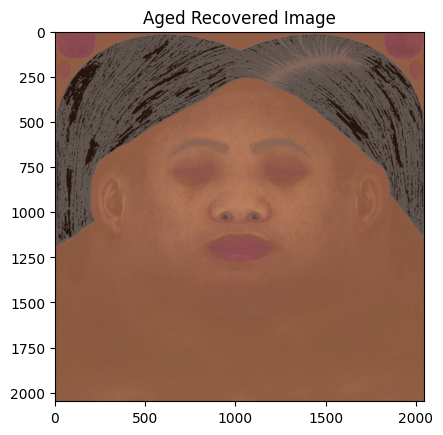

In [10]:
#predict aged maps from neutral
with tf.device('/device:GPU:0'):
    aged_pred_maps_prediction = model.predict(neutral_pred_maps)
#decode aged maps
aged_recovered, aged_decode_time = decode(aged_pred_maps_prediction)
#show original image and  aged recovered image
plt.imshow(neutral_image)
plt.title("Original Image")
plt.show()
plt.imshow(aged_recovered.reshape((2048,2048,3)))
plt.title("Aged Recovered Image")
plt.show()